#### Well so this is the same thing as in getting_comments ,getting the necessary lib and initilization of Mongodb database and creating a new collection to store the data

In [ ]:
import pickle
from collections import defaultdict
import os
import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors
from pymongo import MongoClient
import os
import pandas as pd

In [2]:
client = MongoClient()
client.list_database_names()

['admin', 'config', 'local', 'ted']

In [4]:
db = client['ted']
db.create_collection("ted_stats_new")

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'ted'), 'ted_stats_new')

In [5]:
ted_stats = db.get_collection('ted_stats_new')


In [6]:
with open('E:\\NLP_Recommender_System\\scraping\\random_processes\\scraped_links_2025.pkl', 'rb') as picklefile:
    links_video_ted = pickle.load(picklefile)

In [ ]:
import pickle

def pickle_to_list(file_path):
    try:
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
            return list(data) if hasattr(data, '__iter__') else [data]
    except (FileNotFoundError, pickle.UnpicklingError) as e:
        print(f"Error loading pickle file: {e}")
        return []

my_list = pickle_to_list('E:\\NLP_Recommender_System\\scraping\\random_processes\\scraped_links_2025.pkl')
print(len(my_list))

3212


In [8]:
links_video_ted=my_list

In [9]:
len(links_video_ted)

3212

#### Using Google api to get data, again use your own oAuth id and use this code

In [ ]:
import os
import google_auth_oauthlib.flow
import googleapiclient.discovery
from tqdm import tqdm

def load_processed_videos():
    try:
        with open("processed_videos.txt", "r") as f:
            return set(f.read().splitlines())
    except FileNotFoundError:
        return set()

def save_processed_video(video_id):
    with open("processed_videos.txt", "a") as f:
        f.write(video_id + "\n")

def main():
    # *DO NOT* leave this option enabled in production.
    os.environ["OAUTHLIB_INSECURE_TRANSPORT"] = "1"

    api_service_name = "youtube"
    api_version = "v3"
    client_secrets_file = "D:\\client_secret_974472596179-tcgvota4j3r5eopj9nlmp089kqlitcv9.apps.googleusercontent.com.json"

    flow = google_auth_oauthlib.flow.InstalledAppFlow.from_client_secrets_file(
        client_secrets_file, ["https://www.googleapis.com/auth/youtube.readonly"])
    credentials = flow.run_local_server(port=8080, prompt='consent')
    youtube = googleapiclient.discovery.build(
        api_service_name, api_version, credentials=credentials)
    
    processed_videos = load_processed_videos() 

    for url in tqdm(links_video_ted, desc="Fetching Video Stats", unit="video"):
        if url in processed_videos:
            continue 
        
        try:
            request = youtube.videos().list(part="snippet,contentDetails,statistics", id=url)
            response = request.execute()
            ted_stats.insert_one(response)
            save_processed_video(url) 
        except Exception as e:
            print(f"Error fetching {url}: {e}")
            continue

if __name__ == "__main__":
    main()

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=974472596179-tcgvota4j3r5eopj9nlmp089kqlitcv9.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly&state=0NJW8acI45P3BWNfKFf6yQgMRuL1hy&prompt=consent&access_type=offline


Fetching Video Stats: 100%|██████████| 3212/3212 [10:09<00:00,  5.27video/s]  


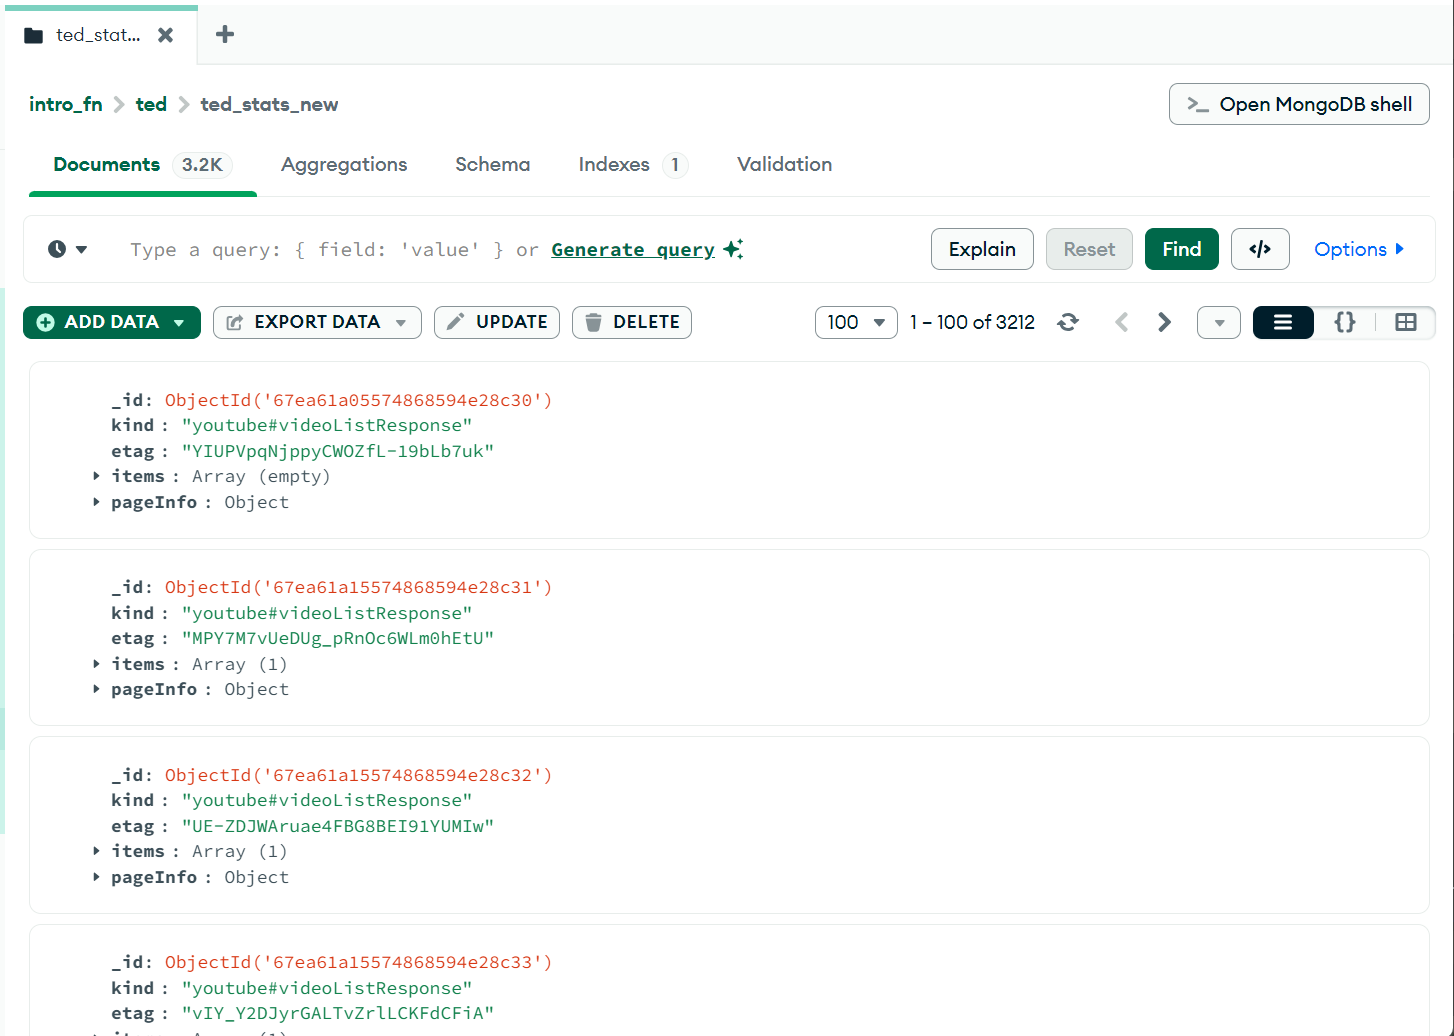
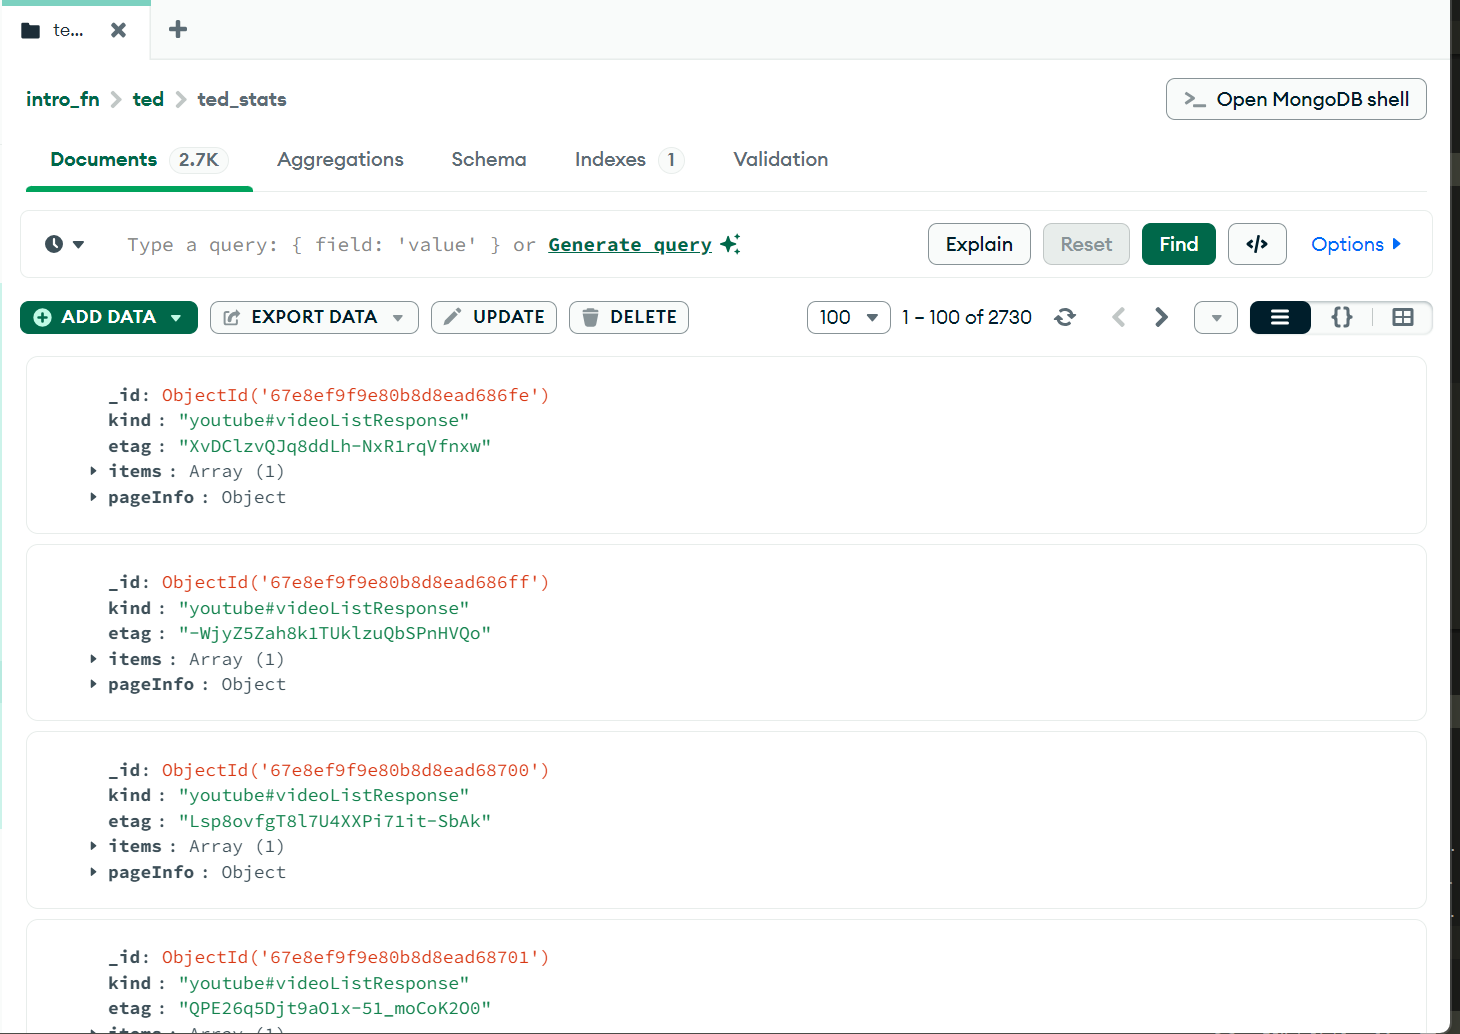